# Introduction to Python :: Session 4

Brent Nef  
September 12, 2018

* Jupyter notebooks <https://python.because.work/>
* <https://github.com/n3f/intro-python/tree/session04>

# #TODO

* [PEP 8](#PEP-8-%F0%9F%94%97) (in chapter 4)
* [Mangling Data](#In-the-beginning-was-ASCII)
* [Systems](#Systems)
* [Putting the Fun in Functions](#Putting-the-Fun-in-Functions)
* [Environments](#Environments) (virtualenv/conda/pipenv/pyenv)

# Python Enhancement Proposals (PEP) <span style="font-size: .7em">[🔗][pep]</span>

* Kind of like RFC's for Python
* Sometimes not really enhancements, but more a way of driving consensus, best practices or procedures

[pep]: https://www.python.org/dev/peps/

# PEP 8 <span style="font-size: .7em">[🔗][pep8]</span>

* See the following pages in the book:
   * 72-73: PEP8 discussion
   * 94: Styling conditions
   * 158: Styling functions
   * 186: Styling classes

[pep8]: https://www.python.org/dev/peps/pep-0008/

## Styling highlights

* Identation should be 4 spaces *(not tabs)*
* Line length: 79 characters *72 for comments and docstrings*
* Surround class definitions with 2 blank lines (and methods inside class by 1 blank line)
* Use UTF-8 as the character encoding
* functions and variable names should be lowercase with `_` separating words

* *"A Foolish Consistency is the Hobgoblin of Little Minds"*
* Guidelines are provided to improve readability
* They are just guidelines

# ...

<center>
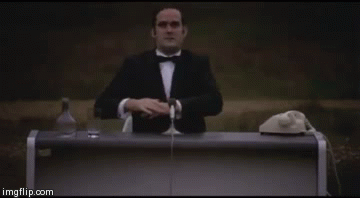
</center>

## In the beginning was ASCII

* ... and things were OK
* But then there were other languages
* ASCII allows for 128 characters
   * 10 digits
   * 26 uppercase
   * 26 lowercase
   * Punctuation, spacing, non-printing control chars

## In the beginning Python used ASCII too

* Python 2 had some issues with character encoding
* Python 3 is all unicode
* Unicode provides a unique number for every character no matter what language or program, *over 120,000 characters*
* Example: <span style="font-size:3em">☃</span>

In [ ]:
import unicodedata

print('\u2603')                      # use the 256 multilingual planes
print('\U00002603')                  # use the higher planes
print('\N{snowman}')                 # specify a character by name
print(unicodedata.lookup('SNOWMAN')) #
print(unicodedata.name('☃'))         # take a character and return a name

## So what?

* Typically you don't have to worry about Python, but when you are exchanging data with the outside world, how the bytes are arranged is important
   * What byte string does the system accept? (*encoding*)
   * What byte string does the system return? (*decoding*)
* Code should work with unicode internally, encoding data as late as possible (last task), and decoding as soon as possible (first task)
   * *Save files as UTF-8, and you'll never have to worry about it*

### ✔️ Try it!

Create a Unicode string called `mystery` and assign it the value `'\U0001f4a9'`. Print `mystery`. Look up the Unicode name for `mystery`.

In [ ]:
# Do it!

## Encoding

In [ ]:
snowman = '\u2603'
print(snowman.encode('utf-8'))            # return byte representation
#print(snowman.encode('ascii'))           # ERROR: ascii doesn't support unicode
print(snowman.encode('ascii', 'replace')) # returns '?' for the characters it can't translate

## Decoding

* Getting byte strings from other systems you need to make them unicode in order to play nice with Python
* *Protip: Use a module to do it for you (e.g. `requests` will do this for you for all HTTP requests)*

In [ ]:
print(b'\xe2\x98\x83'.decode('utf-8'))  # python wantbs to know what format it's currently in

## Formatting text strings (<span style="text-transform:none">`printf`<span> style)

* General format: `'string' % (data)`
* Inside `string` you put interpolation sequences -- like `printf`
   * `%s` generally works for everything
* `data` is a tuple with the same # of items as interpolation sequences in `string`

In [ ]:
print('string: %s' % 42)
print('hexstring: %x' % 42) # %x = hexadecimal number
print('multiple datum: %s %s' % ('test', 0))
print('\"%-*.*s\" :: \"%*.*s\"' % (20, 20, 'left-aligned',  20, 10, 'truncated and right aligned'))

## Formatting text strings (<span style="text-transform:none">`str.format`</span> style)

* Use `{}` as placeholders, and the `.format` method of a string
* Optionally specify the order in the placeholder, or name them
* [Format specification mini-language](https://docs.python.org/3/library/string.html#format-specification-mini-language)

In [ ]:
print('string: {}'.format(42))
print('{2} {0} {1}'.format(*'abc'))    # same as .format('a', 'b', 'c')
print('{exclaim}!'.format(exclaim="what".title()))
print('{:20.20s} :: {:>20.10s}'.format('left-aligned', 'truncated and right aligned'))

## Formatting text strings (<span style="text-transform:none">`string.Template`</span>)

* Simpler method than the other two
   * primary use case is internationalization

In [ ]:
from string import Template

tpl = Template('$who likes $what')
print(tpl.substitute(who='He', what='kung pao')) # throws error if value isn't provided
print(tpl.safe_substitute(who='He'))  # safe_substitute doesn't throw an error if a value isn't provided

## Regular Expressions

* Text processing operations are common
* Use *regular expressions* (regex) to identify and parse text

In [ ]:
import re
re.match('You', 'Young Frankenstein')

### Regex tips/tricks

* Precompile complex or frequently used patterns:
  ```python
  pattern = re.compile('You')
  pattern.match('Young Frankenstein')
  ```
* Other methods:
   * `search(pattern, source)`: returns the first match if any
   * `findall(pattern, source)`: returns a list of all non-overlapping matches, if any
   * `split(pattern, source)`: splits `source` at `pattern` and returns a list of all the string pieces
   * `sub(pattern, replacement, source)`: changes all parts of `source` that match `pattern` with `replacement`

### Regex Patterns

* Specify the number of characters
   * `.` matches one occurence of any character
   * `*` matches any number (0-∞) of the preceding character
   * `?` matches 0 or 1 of the preceding character
   * `+` matches 1 or more of the preceding character
* Special characters represent a class of characters
   * `\d` matches any digit
   * `\D` matches anything NOT a digit
   * `\w` matches alphanumeric characters
   * `\W` matches anything NOT alphanumeric
   * `\s`,`\S`: whitespace

In [ ]:
mammoth = """
We have seen thee, queen of cheese,
Lying quietly at your ease,
Gently fanned by evening breeze,
Thy fair form no flies dare seize.

All gaily dressed soon you'll go
To the great Provincial show,
To be admired by many a beau
In the city of Toronto.

Cows numerous as a swarm of bees,
Or as the leaves upon the trees,
It did require to make thee please,
And stand unrivalled, queen of cheese.

May you not receive a scar as
We have heard that Mr. Harris
Intends to send you off as far as
The great world's show at Paris.

Of the youth beware of these,
For some of them might rudely squeeze
And bite your cheek, then songs or glees
We could not sing, oh! queen of cheese.

We'rt thou suspended from balloon,
You'd cast a shade even at noon,
Folks would think it was the moon
About to fall and crush them soon.
""".strip()

### ✔️ Try it! Regular Expressions

* Import the `re` module to use Python's regular expression functions. Use `re.findall()` to print all the words that begin with `c`
* Find all four-letter words that begin with `c`
* Find all the words that end with `r`.

In [ ]:
# Do it: Regular Expressions

### ✔️ Try it: Parse an email list

* The next 2 functions will create an email list
* Create your own function to parse the list and store the name and email in a dictionary

In [ ]:
import random

def random_string():
    '''Create a string of length 3-7 with random characters'''
    random_letter = lambda: chr(random.randrange(ord('a'), ord('z')))
    return ''.join(random_letter() for l in range(random.randrange(3,7)))

random_string()

In [ ]:
email_list = list('{fname} {lname} <{uname}@{domain}.com>'.format(
        fname=random_string().capitalize(), # first name
        lname=random_string().capitalize(), # last name
        uname=random_string(),              # user name
        domain=random_string()              # domain
    ) for i in range(100))
print('\n'.join(email_list[:5]))

In [ ]:
# Do it: parse email list

# Systems

* File Systems
* Processes
* Concurrency
* Networking

## File Systems

* Python patterned many of its functions after UNIX
   * Some (e.g. `chown`, `chmod`) have the same names
* Use the `os` module

In [ ]:
import os
help(os)

## <span style="text-transform: none">`os`</span> module

* `os.path.exists()`, `os.path.isfile()`, `os.path.isdir()`, `os.path.islink()`, `os.path.abspath()`
* `os.rename()`
* `os.link()`
* `os.remove()`
* See the `shutil` module for other (copying, moving) functions

### Copy all the files from one directory to another

In [ ]:
# setup
import os
os.mkdir('dir1')
open(os.sep.join(('dir1','file1.txt')),'a').close()
open(os.sep.join(('dir1','file2.txt')),'a').close()
os.mkdir('dir2')

In [ ]:
import os
import shutil

dir1 = 'dir1'
dir2 = 'dir2'

src_files = os.listdir(dir1)
for file_name in src_files:
    full_file_name = os.sep.join([os.path.abspath(dir1), file_name])
    if os.path.isfile(full_file_name):
        print('Copying file:', full_file_name)
        shutil.copy(full_file_name, dir2)
    else:
        print('Unable to copy:', full_file_name)


In [ ]:
# cleanup
import shutil

shutil.rmtree('dir1')
shutil.rmtree('dir2')

### Watch a folder for changes

In [ ]:
import os
import time

delay = 1  # How long to wait between loops
path_to_watch = 'dir1'
before = os.listdir(path_to_watch)

while True:
    after = os.listdir(path_to_watch)
    added = [f for f in after if f not in before]
    removed = [f for f in before if f not in after]
    
    if added:
        print('Added:', ', '.join(added))
    if removed:
        print('Removed:', ', '.join(removed))
    if 'quit' in added:
        break
    
    before = after
    time.sleep(delay)

# Concurrency

* Doing more than one thing at a time
   * Processes
   * ~~Threads~~ Not effective in python.  *<span style="font-size:smaller;">But still doable</span>*
* CPU bound
   * Processing intensive tasks
* I/O bound
   * Waiting for reads/writes
   * Waiting for user

# Processes

* When you run an individual program, your operating system creates a single *process*
* It uses system resources (e.g. CPU, RAM, disk space) 
* A process is isolated from other processes -- it can't see what they are doing or interfere with them
* The OS keeps track of all the running processes, giving each a little time and then switching to a different one -- trying to spread the work fairly and keep the system responsive to the user

## <span style="text-transform:none;">`subprocess`</span> module

* Start/stop other programs from Python by using the `subprocess` module
* To just run the command and grab the output, use the `getoutput()` function

In [ ]:
import subprocess

ret = subprocess.getoutput('pwd')
ret

## <span style="text-transform:none;">`multiprocessing`</span> module

* Run a Python function as a separate process using the `multiprocessing` module
* [multiprocessing-example.py](/edit/multiprocessing-example.py)

In [ ]:
!python multiprocessing-example.py

## Multiprocessing with a queue

* Dishes enter the queue when they are washed
* Dishes exit the queue when they are dried
* [washing-dishes.py](/edit/washing-dishes.py)

In [ ]:
!python washing-dishes.py

## Networking

* Another good way to get concurrency is to use networking utilities to offload computation to other resources (e.g. servers, clients)
* You can access as low level networking as you need

In [ ]:
from datetime import datetime
import socket

address = ('localhost', 6789)
max_size = 1000

print('Starting the server at', datetime.now())
print('Waiting for a client to call.')
server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server.bind(address)
server.listen(5)

client, addr = server.accept()
data = client.recv(max_size)

print('At', datetime.now(), client, 'said', data)
client.sendall(b'Are you talking to me?')
client.close()
server.close()

In [ ]:
import socket
from datetime import datetime

address = ('localhost', 6789)
max_size = 1000

print('Starting the client at', datetime.now())
client = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
client.connect(address)
client.sendall(b'Hey!')
data = client.recv(max_size)
print('At', datetime.now(), 'someone replied', data)
client.close()

# Putting the Fun in Functions

* Everything in Python is an object, including functions
   * Assign them to variables
   * Pass them as arguments
   * Return them from other functions

## Lambdas: anonymous function

```python
lambda_name = lambda parameters: expression
# Same as
def <lambda_name>(parameters):
    expression
```

* A function expressed as a single statement
   * *It has to be on one-line*
* Often, using real functions is much clearer than using lambdas
* Lambdas are great where you would need to define many tiny functions and remember what you called them

### Some Examples:

In [ ]:
# Use it to return a function
def make_incrementor(n):
    return lambda x: n + x
forty_twoer = make_incrementor(42)
print(forty_twoer(0))
print(forty_twoer(1))

In [ ]:
# Use it to pass in an argument
pairs = [(1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]
pairs.sort(key=lambda pair: pair[1])
pairs

# Decorators

* A *decorator* is a function that takes a function as input, and returns another function
* This provides a way to modify or augment the behavior of a function without changing what the function actually does


*A common example is to add debugging statements to a function to see what it's arguments are and what it returns*

In [ ]:
# The decorator
def debug_func(func):
    def new_func(*args, **kwargs):
        print('Running function:', func.__name__)
        print('Positional arguments:', args)
        print('Keyword arguments:', kwargs)
        result = func(*args, **kwargs)
        print('Result:', result)
        return result
    return new_func

In [ ]:
# test function:
def adder(a,b):
    return a + b

@debug_func
def subber(a, b):
    return a - b

debug_func(adder)(1,2)
subber(4,3)

# Generators

* Functions that return a sequence
   * `range()` is a generator
* More memory efficient for large sequences as the entire sequence doesn't need to be held in memory


* Using the `yield` statement return one element of a sequence
* When the next element is accessed, the function continues after the `yield`
* State is preserved

In [ ]:
def reverse(data):
    """Generator to reverse any sequence"""
    for index in range(len(data)-1, -1, -1):
        yield data[index]

In [ ]:
bob.__next__()

In [ ]:
for char in reverse('abc'):
    print(char)

### ✔️ Try it! Decorators & Generators

* Define a decorator called `test` that prints `'start'` when a function is called and `'end'` when it finishes
* Define a generator function called `get_odds` that returns the odd numbers from `range(10)`.  Use a `for` loop to find and print the third value returned.

In [ ]:
# Do it: Decorators and Generators

# Adding Libraries

* *Sometimes* the standard library doesn't have functionality that we need
   * It probably exists somewhere: <https://pypi.org/>
* You can search for the functionality you want and install via:
   * `conda install <library>` if you are using anaconda/miniconda, works 90% of the time.  Really good for libraries that have compiled components, specifically those for doing machine learning and data science
   * `pip install <library>`
* See the libraries you have installed by using: `conda list` or `pip freeze`

## Managing dependencies

* Projects will have different dependencies
   * Some projects might even require different versions of the same library
   * Some projects might require different versions of Python (`2.7.x`/`3.6.x`/`3.7.x`)
* Python doesn't allow you to have 2 different versions of the same library... 🤷


***Solution***: Different environments

## Environments

* When you `conda install` or `pip install` put the libraries you download in their own folder structure
* Various tools help with this:
   * `virtualenv`/`virtualenvwrapper` - Original
   * `conda create` - Only works with conda installs
   * 🎆`pipenv`🎆 - new hotness, provides a way to have identical reproducible installs

### Working with conda environments

* Create environment:

  ```sh
  conda create --name <name> [libraries-to-use]
  ```

* Use environment:

  ```sh
  activate <name> # turn off with 'deactivate'
  ```

* List environments:

  ```sh
  conda env list
  ```

# Next Week

* Data Visualizations *(chapters 15, 16, & 17)*

# Post Class Thoughts

* Could use some more about:
   * `requirements.txt`
   * `virtualenv`/`wirtualenvwrapper`
   * Working with environments
   